# <center>Часть 2. Работа с геоданными, визуализация
# <center>библиотека folium

### 2.1. Загрузим агрегированные данные о поездках в мае 2016.   
Просуммируем общее количество поездок такси из каждой географической зоны и посчитаем количество ячеек, из которых в мае не было совершено ни одной поездки.

In [5]:
import pandas as pd
import numpy as np
import os

In [6]:
path_to_data = 'C:\\Users\dsher\Documents\BIGDATA\sales_prediction_(yellow_taxi)'
path_to_results = 'results'

In [7]:
# функция для загрузки агрегированных данных
def read_aggdata(file_name):
    return pd.read_csv(os.path.join(path_to_data, file_name), index_col=0, parse_dates=True)

In [8]:
aggdata = read_aggdata('aggdata_2016-05.csv')

In [9]:
aggdata.head()

,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
aggdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 744 entries, 2016-05-01 00:00:00 to 2016-05-31 23:00:00
Columns: 2500 entries, 1 to 2500
dtypes: int64(2500)
memory usage: 14.2 MB


In [11]:
number_zero_cells = aggdata.sum().value_counts()[0]
number_zero_cells

1283

### 2.2. Нарисуем статическую карту Нью-Йорка. 
Поставим на карте точку там, где находится Эмпайр-Стейт-Билдинг.

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm
%matplotlib inline

In [13]:
# границы и центр Нью-Йорка
west_bound = -74.25559
east_bound = -73.70001
south_bound = 40.49612
north_bound = 40.91553

NY_center_lat = (south_bound + north_bound)/2
NY_center_lng = (west_bound + east_bound)/2

In [14]:
# координаты Empire State Building
long_EMB = -73.985756
lat_EMB = 40.748306

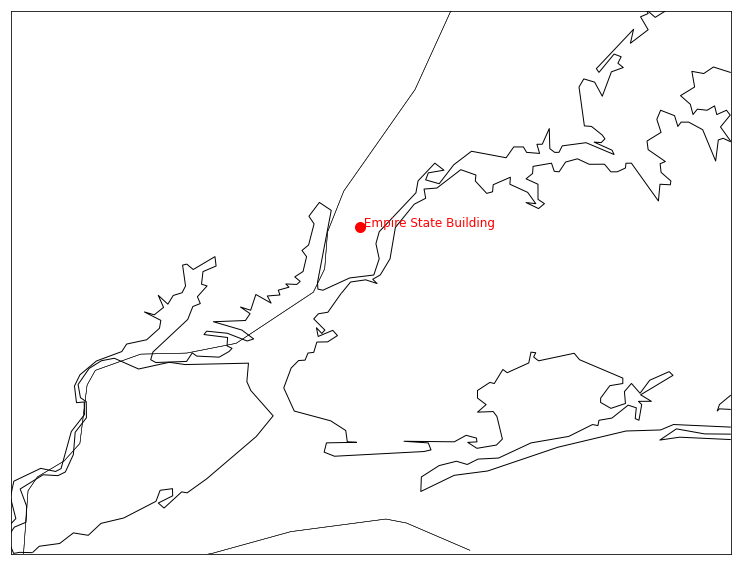

In [16]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
map = Basemap(llcrnrlat=south_bound, urcrnrlat=north_bound,
              llcrnrlon=west_bound, urcrnrlon=east_bound, projection='cyl', lat_ts=south_bound,
              lat_0=NY_center_lat, lon_0=NY_center_lng, resolution='h',
              )

map.drawstates()
map.drawcoastlines()

# map.drawmapboundary(fill_color='aqua')

EMB_x, EMB_y = map(long_EMB, lat_EMB)
plt.plot(EMB_x, EMB_y, 'ok', markersize=10, color='red')
plt.text(EMB_x, EMB_y, ' Empire State Building', fontsize=12, color='red')

plt.show()

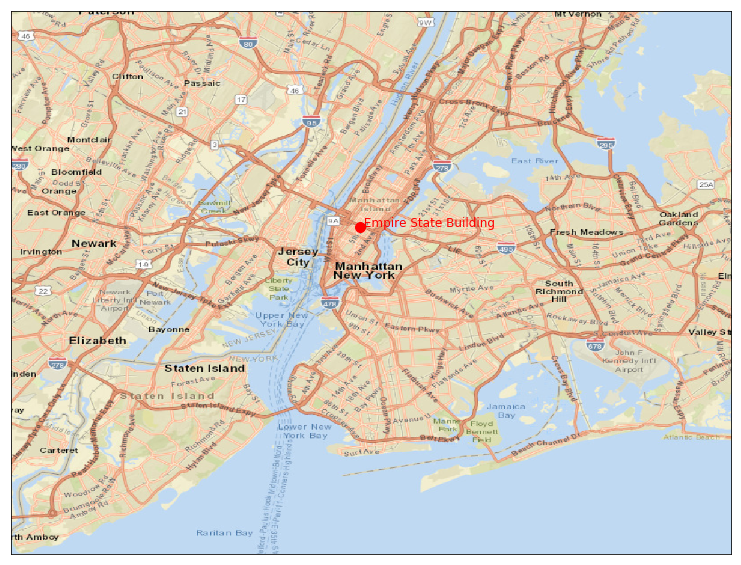

In [18]:
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
map = Basemap(llcrnrlat=south_bound, urcrnrlat=north_bound,
              llcrnrlon=west_bound, urcrnrlon=east_bound, projection='cyl', lat_ts=south_bound,
              lat_0=NY_center_lat, lon_0=NY_center_lng, resolution='h',
              )

# map.drawstates()
# map.drawcoastlines()

EMB_x, EMB_y = map(long_EMB, lat_EMB)
plt.plot(EMB_x, EMB_y, 'ok', markersize=10, color='red')
plt.text(EMB_x, EMB_y, ' Empire State Building', fontsize=12, color='red')

map.arcgisimage(service='World_Street_Map', xpixels=1200)#, dpi=96, ypixels=None)
plt.show()